## What is Fake news?
A type of yellow journalism, fake news encapsulates pieces of news that may be hoaxes and is generally spread through social media and other online media. This is often done to further or impose certain ideas and is often achieved with political agendas. Such news items may contain false and/or exaggerated claims, and may end up being viralized by algorithms, and users may end up in a filter bubble.

##What is a PassiveAggressiveClassifier?
Passive Aggressive algorithms are online learning algorithms. Such an algorithm remains passive for a correct classification outcome, and turns aggressive in the event of a miscalculation, updating and adjusting. Unlike most other algorithms, it does not converge. Its purpose is to make updates that correct the loss, causing very little change in the norm of the weight vector.

In [11]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [12]:
#Read the data
df=pd.read_csv("news.csv")
#Get shape and head
print(df.shape)
df.head()

(6335, 4)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [13]:
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [14]:
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

In [15]:

tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [16]:

pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)


y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.74%


In [17]:

confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[587,  51],
       [ 41, 588]])

In [18]:
pac.predict(tfidf_vectorizer.transform(["BJP karyakartas had liked muslim since 1970"]))

array(['FAKE'], dtype='<U4')

# LSTM 

In [19]:
#Basic libraries
import pandas as pd 
import numpy as np 

#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

#NLTK libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# Machine Learning libraries
import sklearn 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
 

#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Miscellanous libraries
from collections import Counter

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Deep learning libraries
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [20]:
#Creating a copy 
df_=df.copy()
def review_cleaning(text):

  '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
  and remove words containing numbers.'''
  text = str(text).lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  return text
df_['text']=df_['text'].apply(lambda x:review_cleaning(x))
df_.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,daniel greenfield a shillman journalism fellow...,FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,google pinterest digg linkedin reddit stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,us secretary of state john f kerry said monday...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,— kaydee king kaydeeking november the lesson...,FAKE
4,875,The Battle of New York: Why This Primary Matters,its primary day in new york and frontrunners h...,REAL


In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
stop = stopwords.words('english')
df_['text'] = df_['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,daniel greenfield shillman journalism fellow f...,FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,google pinterest digg linkedin reddit stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,us secretary state john f kerry said monday st...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,— kaydee king kaydeeking november lesson tonig...,FAKE
4,875,The Battle of New York: Why This Primary Matters,primary day new york frontrunners hillary clin...,REAL


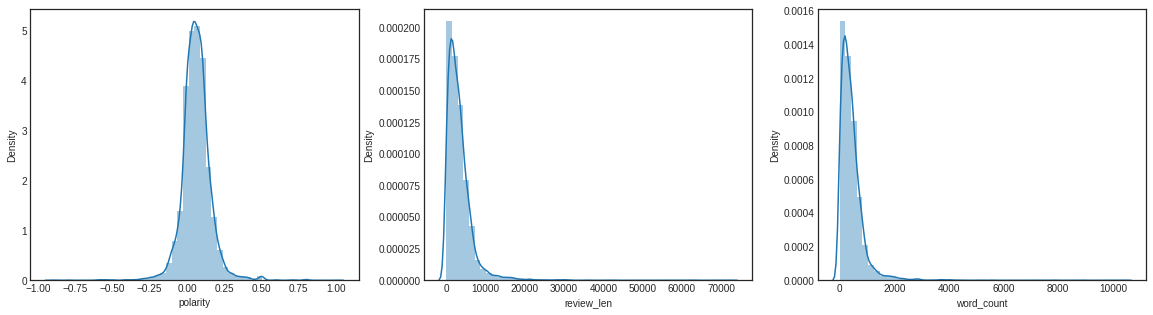

In [23]:
#Extracting the features from the news
df_['polarity'] = df_['text'].map(lambda text: TextBlob(text).sentiment.polarity)
df_['review_len'] = df_['text'].astype(str).apply(len)
df_['word_count'] = df_['text'].apply(lambda x: len(str(x).split()))

#Plotting the distribution of the extracted feature
plt.figure(figsize = (20, 5))
plt.style.use('seaborn-white')
plt.subplot(131)
sns.distplot(df_['polarity'])
fig = plt.gcf()
plt.subplot(132)
sns.distplot(df_['review_len'])
fig = plt.gcf()
plt.subplot(133)
sns.distplot(df_['word_count'])
fig = plt.gcf()

In [24]:
#Function to get top n words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Calling function and return only top 20 words
common_words = get_top_n_words(df_['text'], 20)

#Printing the word and frequency
for word, freq in common_words:
    print(word, freq)

trump 19329
said 19185
clinton 15362
would 12674
us 12317
people 11364
one 10922
new 9145
state 8217
also 8163
president 8025
campaign 7285
obama 6996
like 6980
hillary 6911
could 6517
time 6288
even 6268
states 6161
it 6071


In [25]:
#Creating the dataframe of word and frequency
df1 = pd.DataFrame(common_words, columns = ['news' , 'count'])

#Group by words and plot the sum
df1.groupby('news').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in news')

In [26]:
#Function to get top bigram words
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Calling function and return only top 20 words
common_words = get_top_n_bigram(df_["text"], 20)

#Printing the word and frequency
for word, freq in common_words:
    print(word, freq)

hillary clinton 3961
donald trump 3377
united states 2904
white house 2155
new york 2087
fox news 1079
president obama 1070
secretary state 1050
we re 1012
they re 937
new hampshire 913
supreme court 896
foreign policy 871
clinton campaign 852
barack obama 838
bernie sanders 812
islamic state 810
state department 776
last week 760
wall street 756


In [27]:
#Creating the dataframe of word and frequency
df3 = pd.DataFrame(common_words, columns = ['news' , 'count'])

#Group by words and plot the sum
df3.groupby('news').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in news')

In [28]:
text = df_[df_["label"]=="FAKE"]["text"]


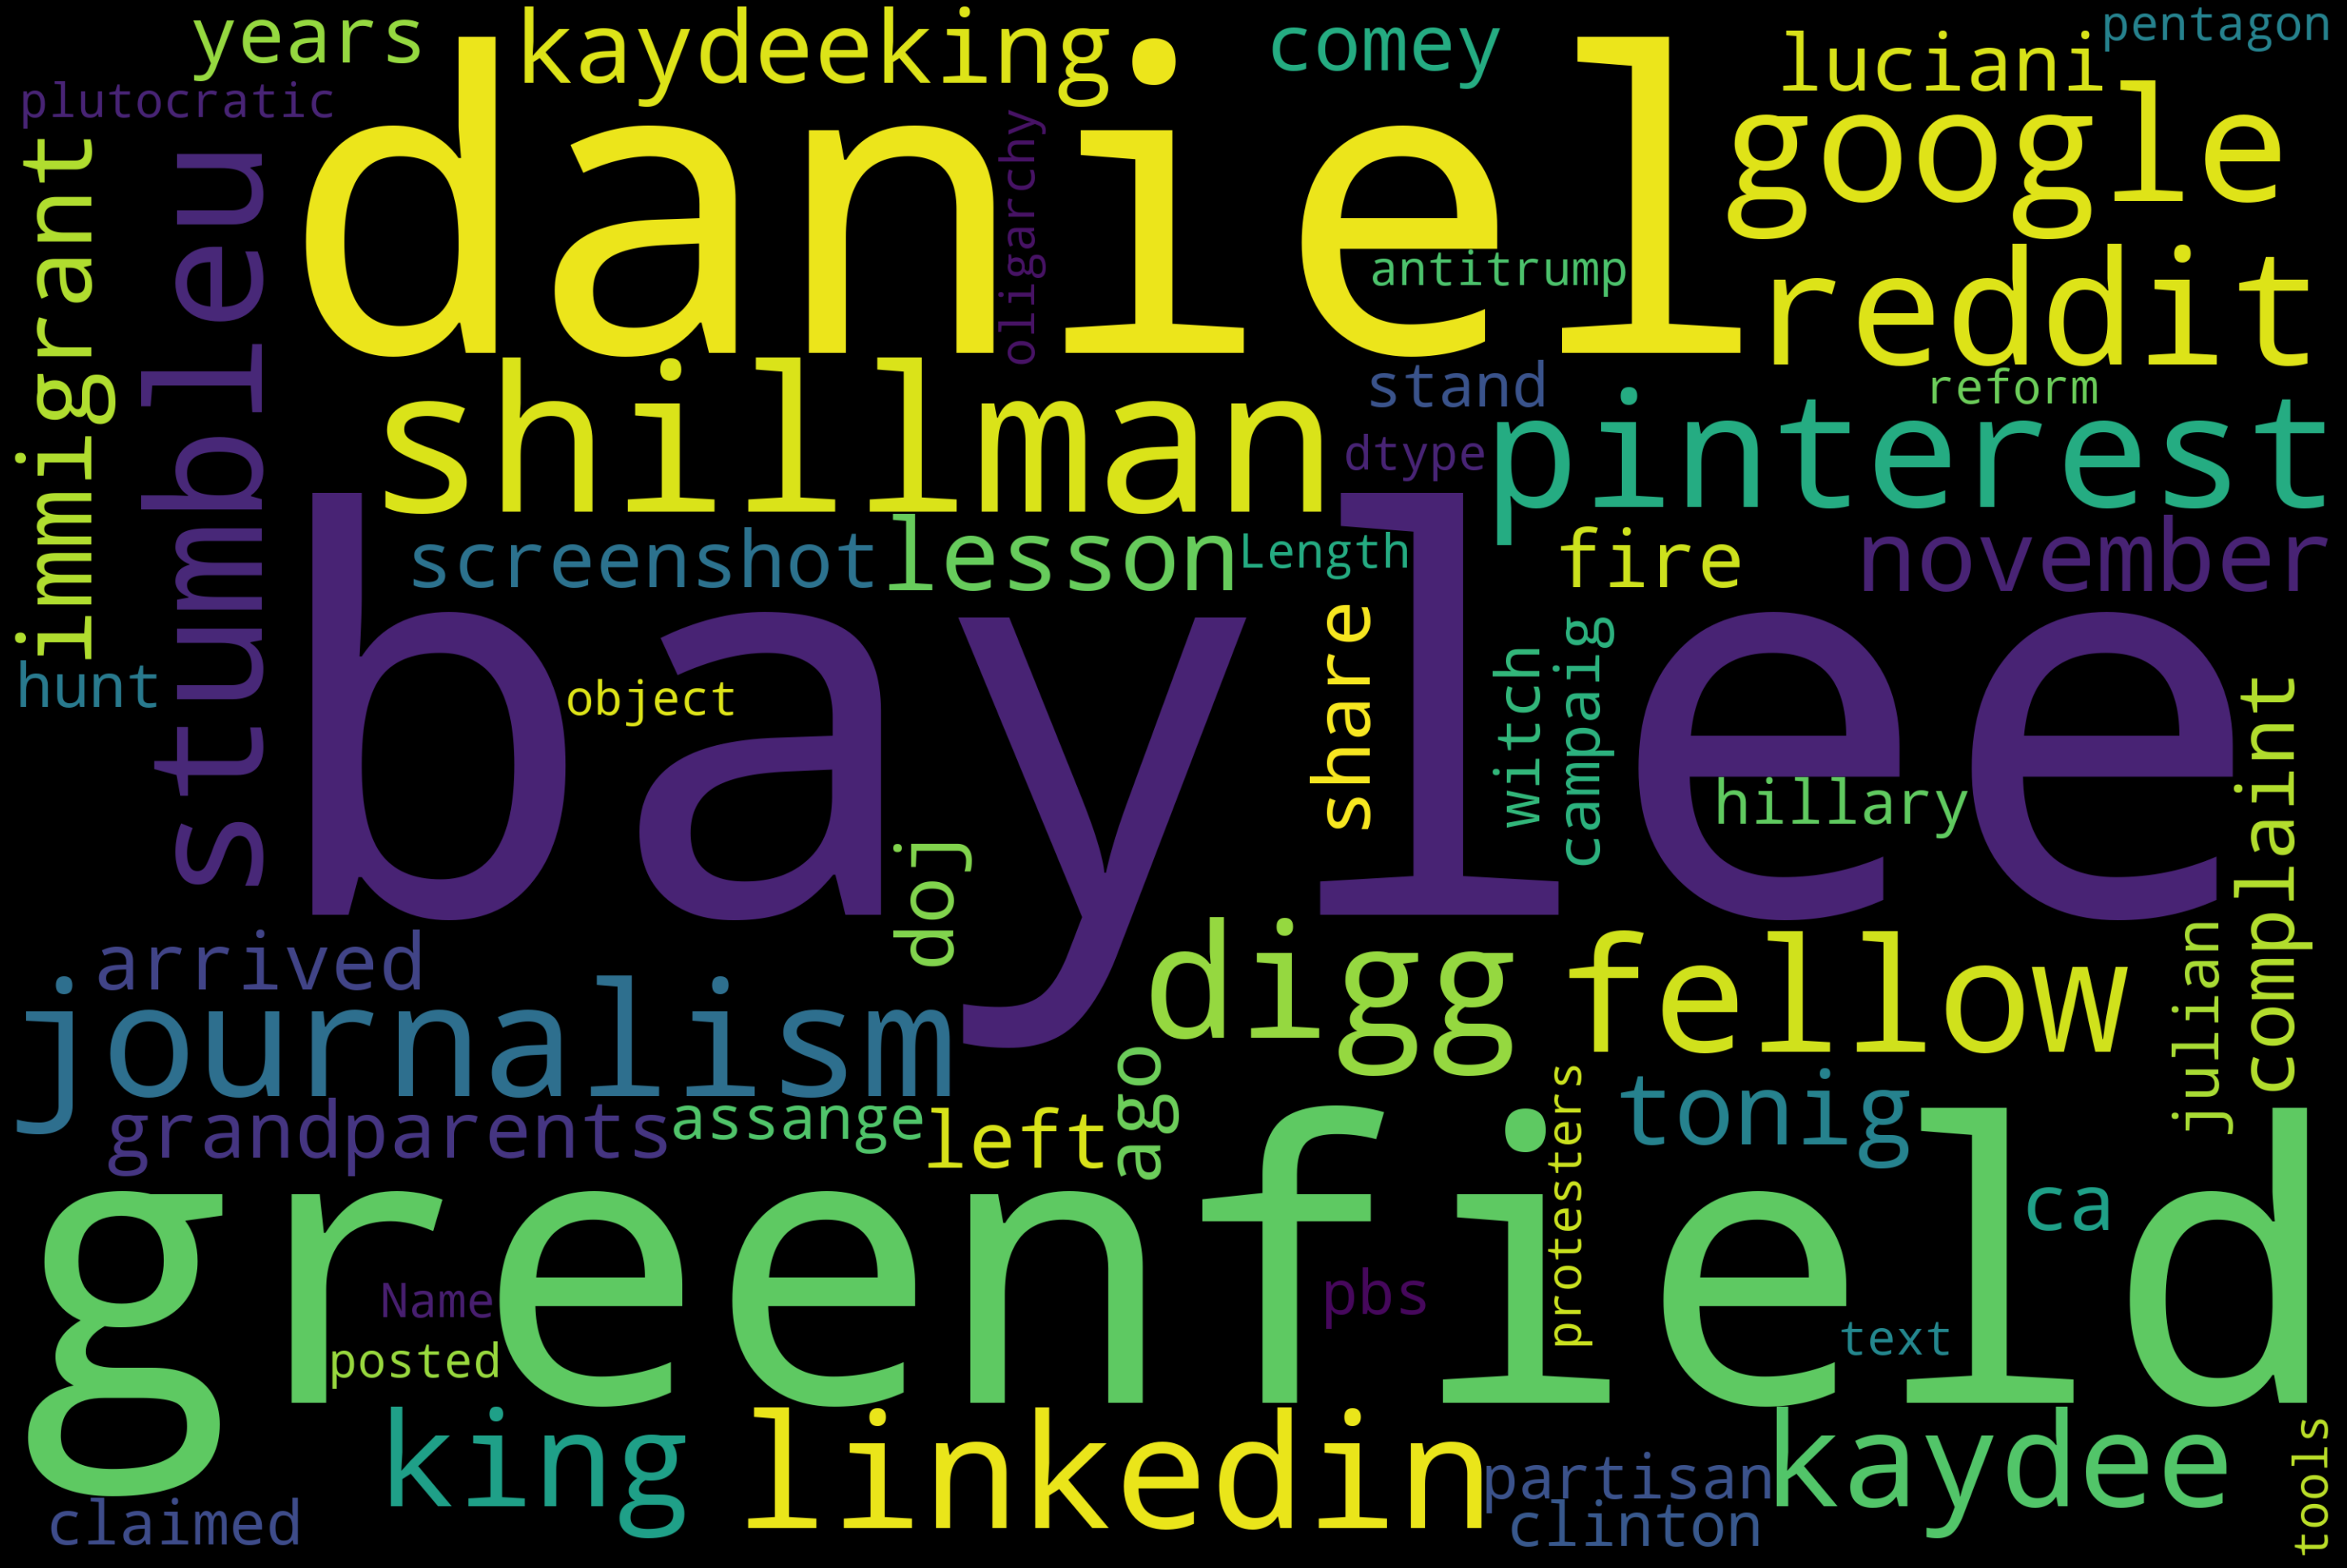

In [29]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

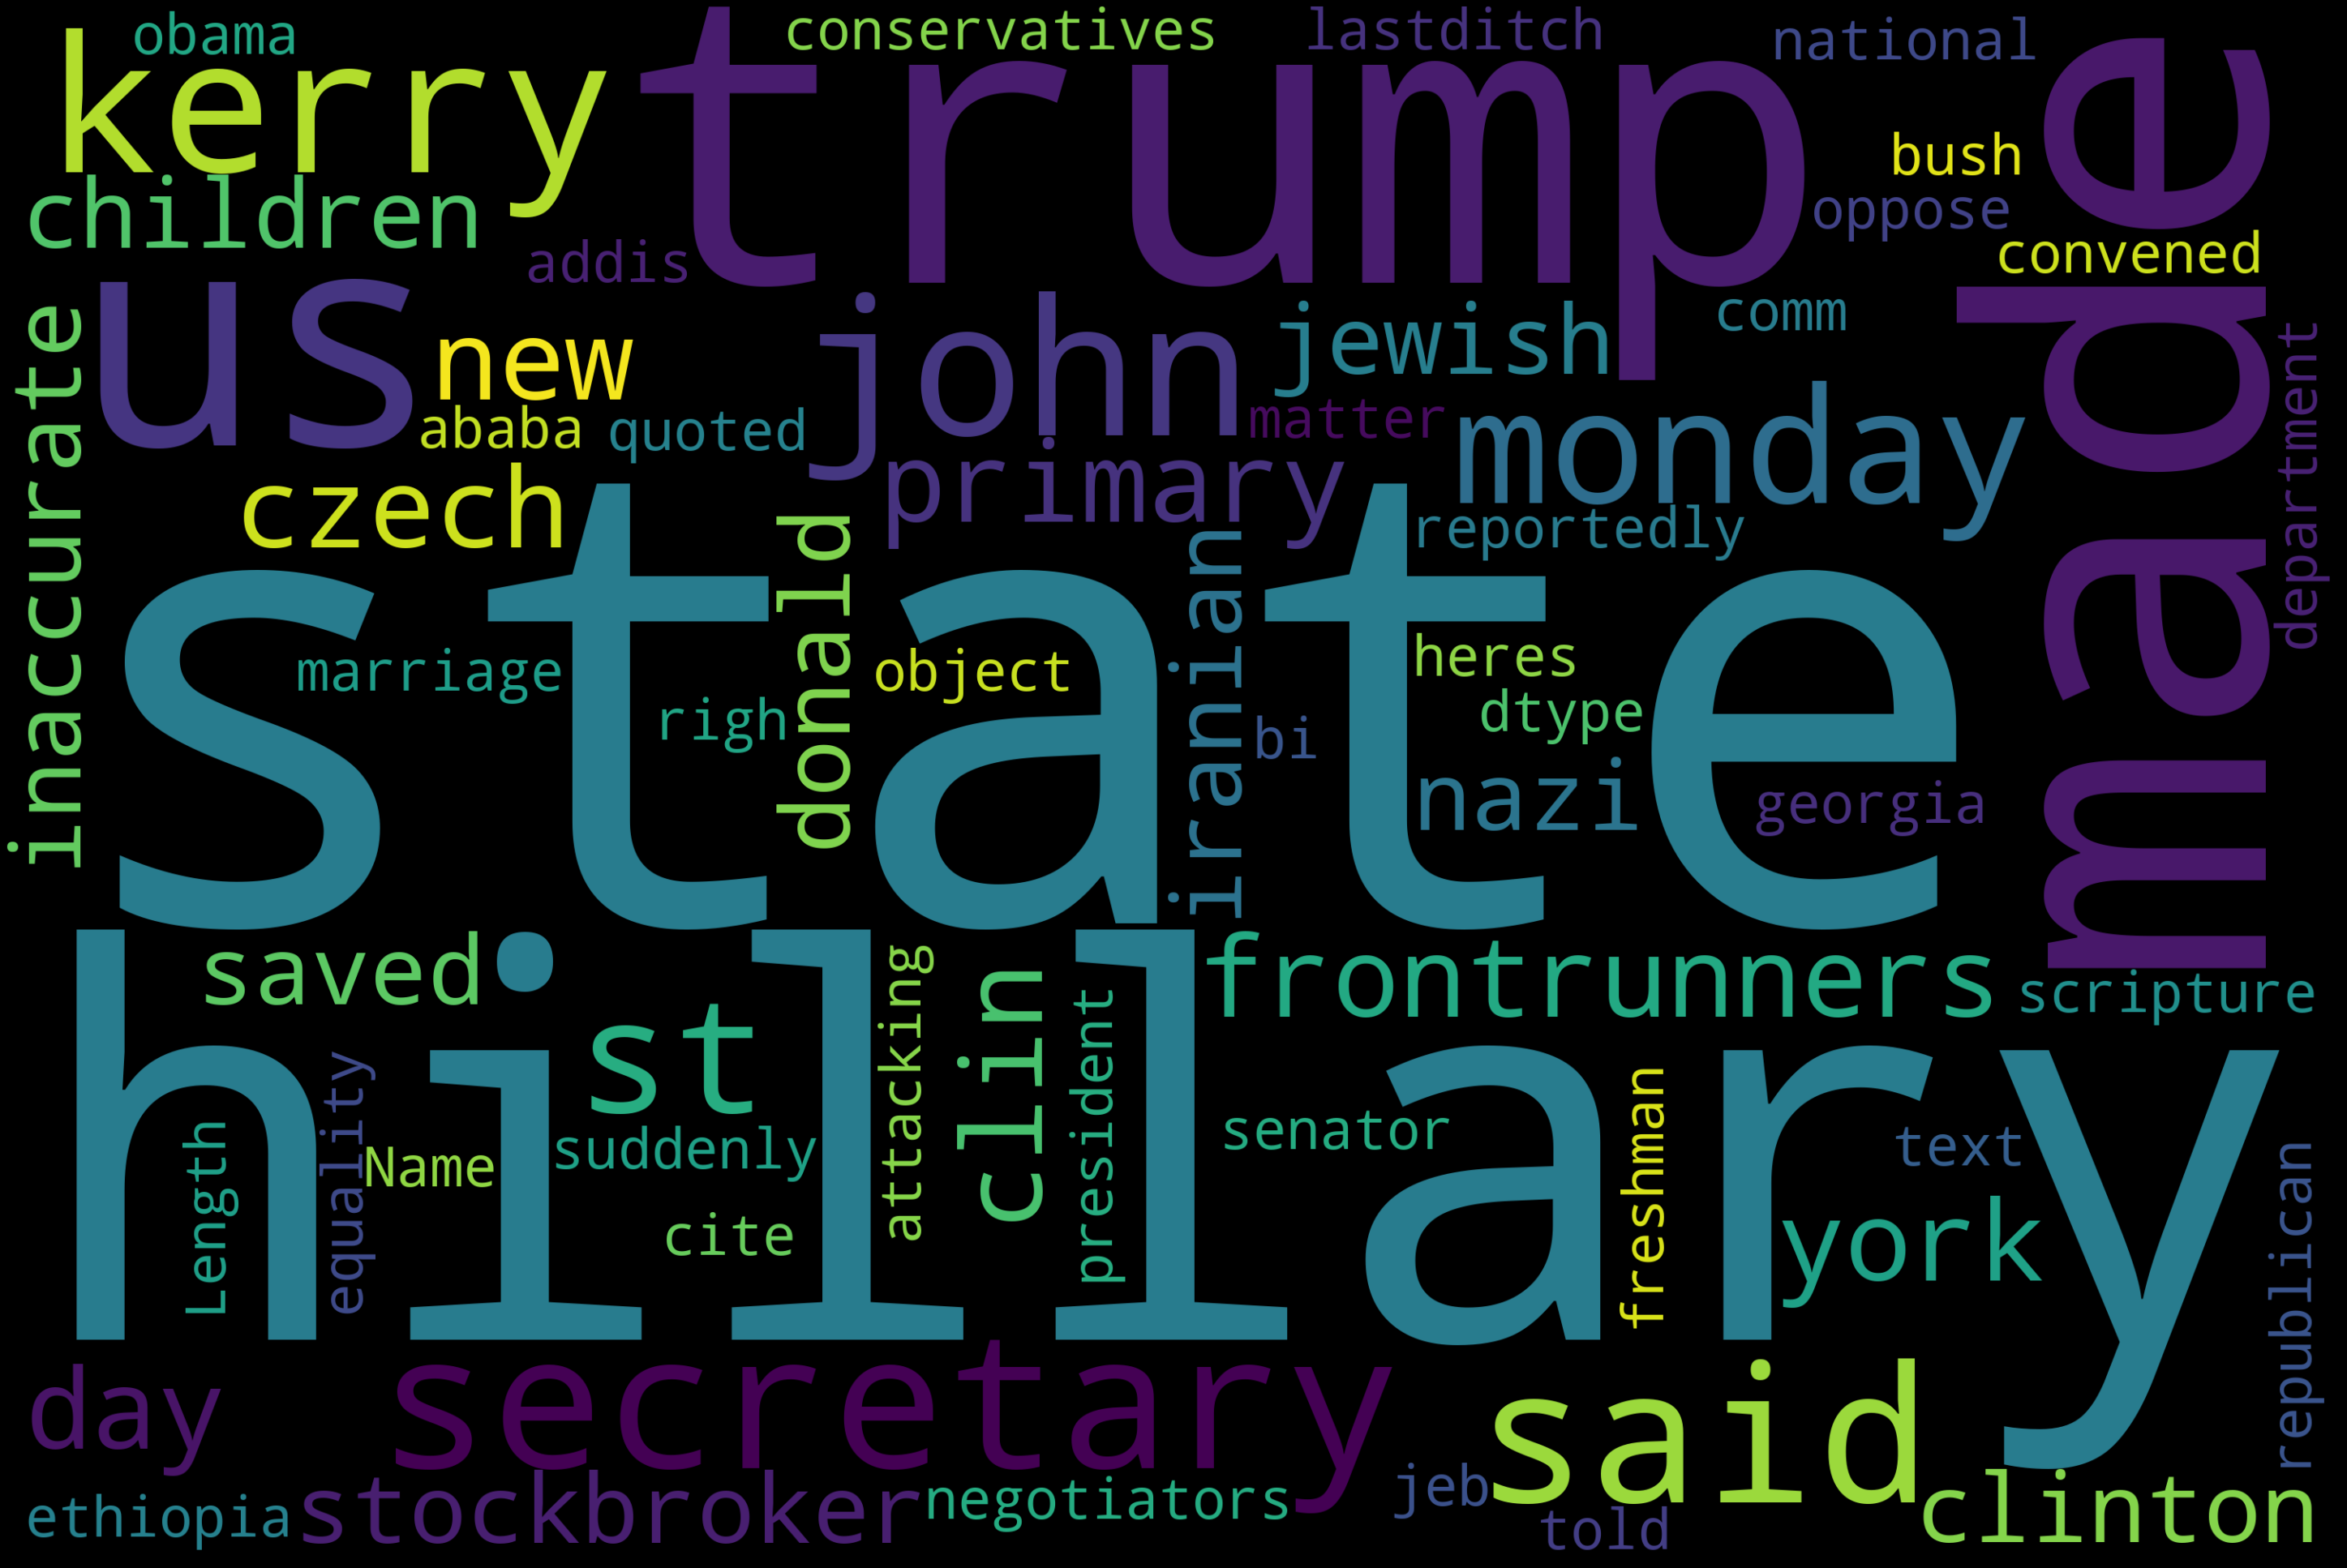

In [30]:
text = df_[df_["label"]=="REAL"]["text"]

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [31]:

news_features=df.copy()
news_features=news_features[['text']].reset_index(drop=True)
news_features.head()

,text
0,"Daniel Greenfield, a Shillman Journalism Fello..."
1,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,U.S. Secretary of State John F. Kerry said Mon...
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T..."
4,It's primary day in New York and front-runners...


In [32]:
stop_words = set(stopwords.words("english"))
#Performing stemming on the review dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(news_features)):
    news = re.sub('[^a-zA-Z]', ' ', news_features['text'][i])
    news= news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in stop_words]
    news = ' '.join(news)
    corpus.append(news)  

In [33]:
corpus[1]

'googl pinterest digg linkedin reddit stumbleupon print delici pocket tumblr two fundament truth world paul ryan desper want presid paul ryan never presid today prove particularli stagger exampl polit cowardic paul ryan revers cours announc back trump train aboutfac week ago previous declar would support defend trump tape made public trump brag assault women suddenli ryan appear pro trump ralli boldli declar alreadi sent vote make presid unit state surreal moment figurehead republican parti dose gasolin got stage chilli afternoon wisconsin lit match speakerryan say vote realdonaldtrump republican time come home http co vytt yvoe pic twitter com wcvscg abc news polit abcpolit novemb democrat parti ask better moment film ryan chanc ever becom presid went zero instant wreckag trump leav behind wake cravenli back campaign recov ryan career manag limp way dnc tape lock load use everi ad elect day ring endors man clearli hate person level speak volum spineless ryan postur principl conserv on

In [34]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(news_features['text'])
X.shape

(6335, 5000)

In [35]:
y=df_["label"]

In [36]:
## Divide the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [37]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [38]:
#creating the objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
nb_cv=MultinomialNB(alpha=0.1) 
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,nb_cv]

#Printing the accuracy
for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.9059179412043198
Decision Tree Test Accuracy: 0.785957161580975
KNN Test Accuracy: 0.5362290131116659
Naive Bayes Test Accuracy: 0.8700843711533383


In [39]:
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

LogisticRegression(C=11.513953993264458, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
The mean accuracy of the model is: 0.9128787878787878


In [40]:
logreg = LogisticRegression(C=24.420530945486497, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


Confusion matrix, without normalization


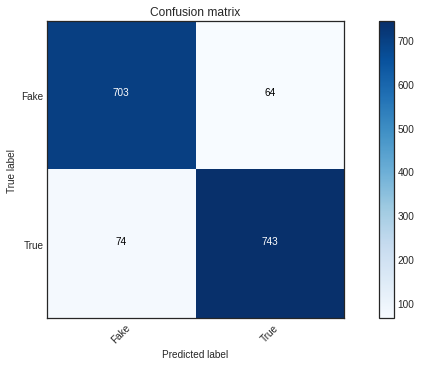

In [41]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Fake','True'])

In [42]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

        FAKE       0.90      0.92      0.91       767
        REAL       0.92      0.91      0.92       817

    accuracy                           0.91      1584
   macro avg       0.91      0.91      0.91      1584
weighted avg       0.91      0.91      0.91      1584



In [43]:
#Setting up vocabulary size
voc_size=10000

#One hot encoding 
onehot_repr=[one_hot(words,voc_size)for words in corpus] 

In [44]:
#Setting sentence length
sent_length=5000

#Padding the sentences
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 6173 5218 5771]
 [   0    0    0 ... 6724 6116 9140]
 [   0    0    0 ... 1211 6681 7393]
 ...
 [   0    0    0 ... 8689 9794  481]
 [   0    0    0 ... 3250 1219  581]
 [   0    0    0 ... 7833 2834 4309]]


In [45]:
embedded_docs[1]

array([   0,    0,    0, ..., 6724, 6116, 9140], dtype=int32)

In [46]:
#Creating the lstm model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100)) #Adding 100 lstm neurons in the layer
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

#Compiling the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 5000, 40)          400000    
_________________________________________________________________
dropout (Dropout)            (None, 5000, 40)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 456,501
Trainable params: 456,501
Non-trainable params: 0
_________________________________________________________________
None


In [47]:
len(embedded_docs),y.shape

(6335, (6335,))

In [48]:
dict = {"FAKE":0,"REAL":1}

In [49]:
y = y.replace(dict)

In [50]:
# Converting the X and y as array
X_final=np.array(embedded_docs)
y_final=np.array(y)

#Check shape of X and y final
X_final.shape,y_final.shape

((6335, 5000), (6335,))

In [ ]:
# Train test split of the X and y final
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

# Fitting with 10 epochs and 64 batch size
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
67/67 [==============================] - 546s 8s/step - loss: 0.5679 - accuracy: 0.7158 - val_loss: 0.4479 - val_accuracy: 0.7838
Epoch 2/10
67/67 [==============================] - 528s 8s/step - loss: 0.3369 - accuracy: 0.8711 - val_loss: 0.3442 - val_accuracy: 0.8785
Epoch 3/10
67/67 [==============================] - 521s 8s/step - loss: 0.1916 - accuracy: 0.9371 - val_loss: 0.2675 - val_accuracy: 0.9015
Epoch 4/10
67/67 [==============================] - 549s 8s/step - loss: 0.1193 - accuracy: 0.9628 - val_loss: 0.2654 - val_accuracy: 0.9034
Epoch 5/10
67/67 [==============================] - 520s 8s/step - loss: 0.0926 - accuracy: 0.9731 - val_loss: 0.3031 - val_accuracy: 0.8934
Epoch 6/10
67/67 [==============================] - 520s 8s/step - loss: 0.0643 - accuracy: 0.9811 - val_loss: 0.3339 - val_accuracy: 0.8761
Epoch 7/10
67/67 [==============================] - 519s 8s/step - loss: 0.0444 - accuracy: 0.9873 - val_loss: 0.3690 - val_accuracy: 0.9024
Epoch 8/10
67

In [ ]:
# Predicting from test data
y_pred=model.predict_classes(X_test)

#Creating confusion matrix
#confusion_matrix(y_test,y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,classes=['Fake','True'])

In [ ]:
#Checking for accuracy
accuracy_score(y_test,y_pred)

In [ ]:
# Creating classification report 
print(classification_report(y_test,y_pred))

In [ ]:
# Creating bidirectional lstm model
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(100))) # Bidirectional LSTM layer
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

In [ ]:
# Fitting the model
model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

In [ ]:
# Predicting from test dataset
y_pred1=model1.predict_classes(X_test)

#Confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred1)
plot_confusion_matrix(cm,classes=['Fake','True'])

In [ ]:
#Calculating Accuracy score
accuracy_score(y_test,y_pred1)

In [ ]:
# Creating classification report 
print(classification_report(y_test,y_pred1))